## Running SAMsparse

Below, is a quickstart tutorial to analyze scRNA-seq data using SAM and visualize results. For a deeper exploration of all the attributes contained within a SAM object, feel free to explore the documentation in the source code 'SAMsparse.py'.

In [1]:
from SAMsparse import SAM

We initialize the SAM object with default values.

In [2]:
sam = SAM()

'load_dense_data_from_file' loads the expression matrix from a tabular file, filters the data, and stores it in a scipy.sparse matrix. After loading the dense data, SAM saves the sparse data to a file for faster loading in the future for large datasets.

SAM expects a data table of genes as rows and cells as columns. The first row of the table should be cell identifiers and the first column of the table should be gene identifiers.

Let's use all default parameters for now.

In [3]:
sam.load_dense_data_from_file('../example_data/GSE74596_data.csv.gz',
                             save_sparse_files=True)

To load existing sparse data,

In [4]:
sam.load_sparse_data('../example_data/GSE74596_data_sparse.npz',
                    '../example_data/GSE74596_data_genes.txt',
                    '../example_data/GSE74596_data_cells.txt')

We also have cell annotations we can load (optional),

In [5]:
sam.load_annotations('../example_data/GSE74596_ann.csv',delimiter=',')

To run SAM using default parameters,

In [6]:
sam.run()

RUNNING SAM
Iteration: 0, Convergence: 0.6743553181400014
Iteration: 1, Convergence: 0.3893570801860928
Iteration: 2, Convergence: 0.02981651377083808
Iteration: 3, Convergence: 0.01359742777073758
Iteration: 4, Convergence: 0.009916772069201496
Iteration: 5, Convergence: 0.007293516500229099
Iteration: 6, Convergence: 0.0067027363378083064
Iteration: 7, Convergence: 0.004863777610213134
Iteration: 8, Convergence: 0.003927236953346076
Iteration: 9, Convergence: 0.00387936977799657
Iteration: 10, Convergence: 0.003748911278194034
Iteration: 11, Convergence: 0.0038342259916389282
Iteration: 12, Convergence: 0.00386535854414206
Iteration: 13, Convergence: 0.0035458101414165156
Iteration: 14, Convergence: 0.004404930801871574
Elapsed time: 3.2180185317993164 seconds


To compute the umap projection:

In [7]:
sam.run_umap();

## Visualization

To visualize the UMAP embedding:

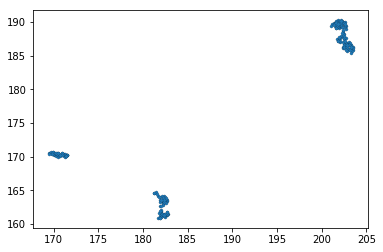

In [8]:
sam.scatter(projection='umap')

To visualize the UMAP embedding with our ground truth annotations overlaid:

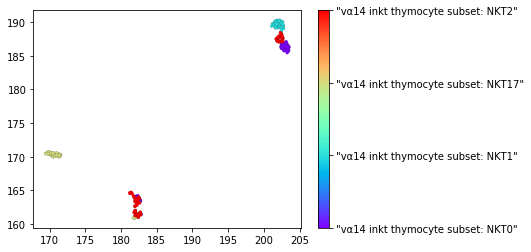

In [9]:
sam.scatter(c=sam.annotations,projection='umap')

The ranked genes are stored in 'sam.ranked_genes'. Printing the top 10 ranked_genes,

In [10]:
print( sam.ranked_genes[:10] )

['ENSMUSG00000037313.16' 'ENSMUSG00000005233.16' 'ENSMUSG00000027496.15'
 'ENSMUSG00000023505.13' 'ENSMUSG00000023367.14' 'ENSMUSG00000027715.9'
 'ENSMUSG00000074403.2' 'ENSMUSG00000027326.13' 'ENSMUSG00000069272.5'
 'ENSMUSG00000094777.2']


If we want to display the gene expression pattern of the number one ranked gene, we can use the following:

(Note that all valid keyword arguments for 'matplotlib.pyplot.scatter' can be used in any of the plotting functions).

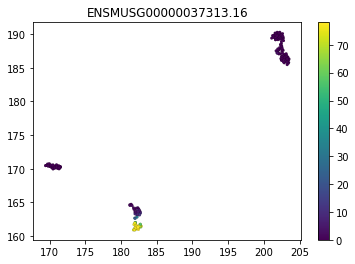

In [11]:
sam.show_gene_expression( sam.ranked_genes[0], s=8, cmap='viridis', projection='umap')

To display the top 3 genes,

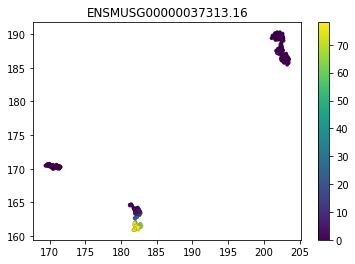

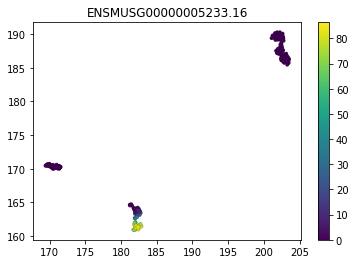

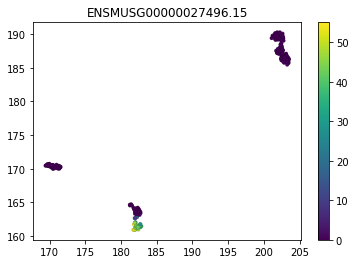

In [12]:
sam.plot_top_genes(n_genes=3,s=14,cmap='viridis')

To display roughly orthogonal gene expression patterns:

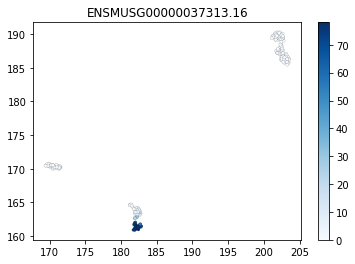

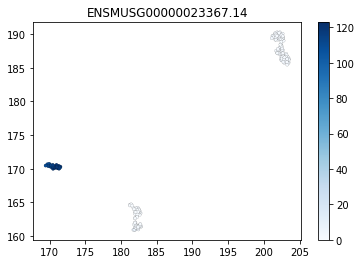

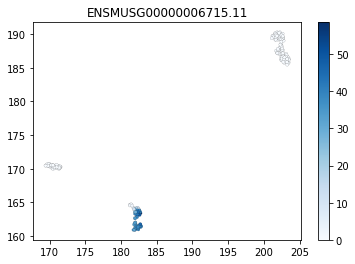

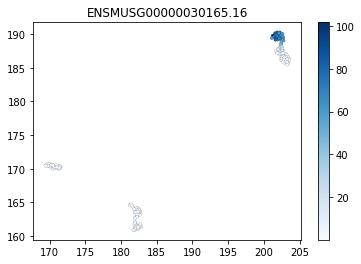

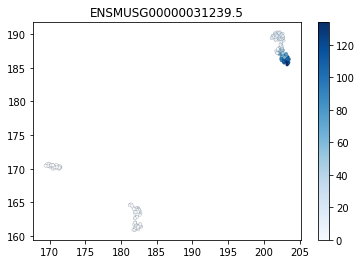

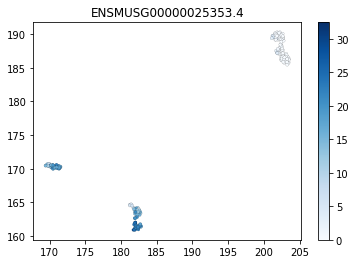

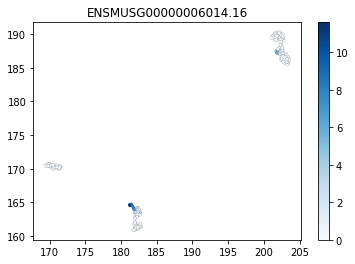

In [13]:
sam.plot_correlated_groups(cmap='Blues',edgecolor='black')

#save all opened figures to a pdf file
sam.save_figures('all_figures.pdf')
#save figures 2 and 4 to a pdf file
sam.save_figures('figures_2_4.pdf',fig_IDs=[2,4])
#save figure 3 to a png file
sam.save_figures('figure_3.png',fig_IDs=3)


To display genes correlated with a given gene:

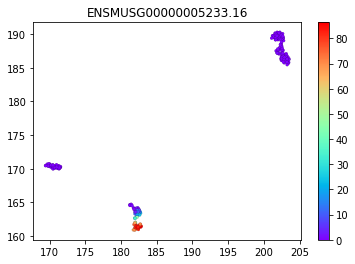

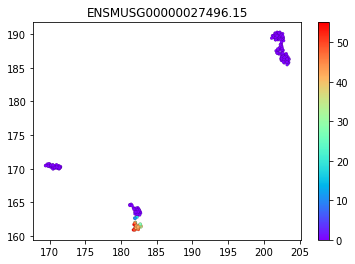

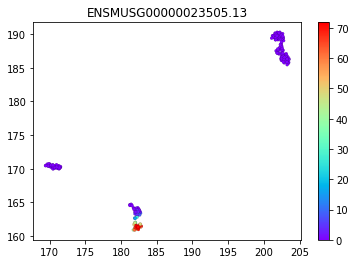

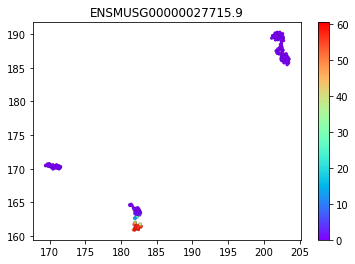

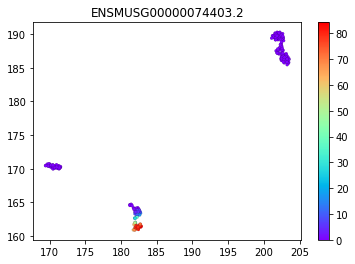

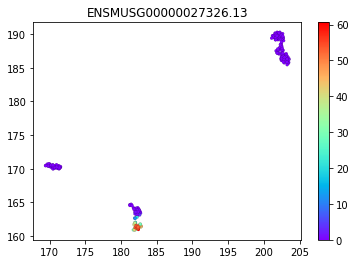

In [14]:
sam.plot_correlated_genes( sam.ranked_genes[0] , n_genes=6 ); 

## Input/Output

To save the SAM object and all its contents into a Pickle file:

In [15]:
sam.save('example_save',dirname = 'output_directory')

To load a saved SAM object:

In [16]:
sam=SAM(); #create an empty SAM object
sam.load('output_directory/example_save.p')

Individual attributes within the SAM object, such as the cell-to-cell distance matrix, the list of ranked genes, the nearest neighbor matrix, the rescaled expression matrix, etc., can be manually saved/exported using any desired method.

See below for a list of all attributes stored in SAM after running the analysis:

In [17]:
list(sam.__dict__.keys())

['k',
 'distance',
 'analysis_performed',
 'output_vars',
 'sparse_data',
 'all_cell_names',
 'all_gene_names',
 'D',
 'gene_names',
 'cell_names',
 'annotations',
 'integer_annotations',
 'D_avg',
 'wPCA_data',
 'indices',
 'nnm_adj',
 'weights',
 'ranked_genes',
 'gene_groups',
 'geneID_groups',
 'umap2d']